### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### 1. Importing libraries and data

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# This command prompts matplotlib visuals to appear in the notebook

%matplotlib inline

In [9]:
# Creating a path for importing/exporting
path = r'/Users/peterguan/Citi Bike Analysis'

In [11]:
# Importing the 'bike_cleaned' dataset
bike_cleaned = pd.read_csv(r'/Users/peterguan/Citi Bike Analysis/02 Data/Prepared Data/bike.csv', index_col = False)

### 2. Data cleaning

In [19]:
# Checking all the columns in the dataset
bike_cleaned.columns

Index(['Unnamed: 0', 'trip_id', 'bike_id', 'weekday', 'start_hour',
       'start_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_time',
       'end_station_id', 'end_station_name', 'end_station_latitude',
       'end_station_longitude', 'trip_duration', 'subscriber', 'birth_year',
       'gender', 'age'],
      dtype='object')

In [15]:
# Checking the first 5 rows in the dataset
bike_cleaned.head()

,Unnamed: 0,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age
0,0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,Female,45
1,1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,Male,30
2,2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,Male,24
3,3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,Female,25
4,4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978,Unknown,35


In [42]:
# Dropping unnecessary columns
bike_cleaned = bike_cleaned.drop(columns = ['Unnamed: 0'])

In [44]:
# Checking the dimensions of the dataset
bike_cleaned.shape

(49972, 19)

##### Missing values

In [46]:
# Checking for missing values

bike_cleaned.isnull().sum()

# No missing values to handle

trip_id                    0
bike_id                    0
weekday                    0
start_hour                 0
start_time                 0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_time                   0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
trip_duration              0
subscriber                 0
birth_year                 0
gender                     0
age                        0
dtype: int64

##### Checking for Duplicates

In [48]:
# Checking for duplicates
bike_duplicates = bike_cleaned.duplicated()

In [50]:
# No duplicates found
bike_duplicates.shape

(49972,)

##### Descriptive Statistics

In [52]:
# Checking the descriptive statistics
bike_cleaned.describe()

,bike_id,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,age
count,49972.00000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000
mean,17615.30313,14.145922,443.306792,40.734170,-73.991106,442.526035,40.733860,-73.991348,838.916873,1975.999240,37.000760
std,1675.10716,4.860677,356.582817,0.019911,0.012553,355.701958,0.019885,0.012569,573.687019,10.178138,10.178138
min,14556.00000,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,60.000000,1924.000000,16.000000
25%,16188.00000,10.000000,304.000000,40.720196,-74.000271,304.000000,40.720196,-74.001547,417.000000,1970.000000,30.000000
50%,17584.00000,15.000000,402.000000,40.735877,-73.990765,402.000000,40.735354,-73.990985,672.000000,1978.000000,35.000000
75%,19014.00000,18.000000,484.000000,40.750020,-73.981923,483.000000,40.749013,-73.982050,1112.000000,1983.000000,43.000000
max,20642.00000,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,2697.000000,1997.000000,89.000000


### 3. Data prep for regression analysis

In [55]:
# Checking all the columns
bike_cleaned.columns

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender', 'age'],
      dtype='object')

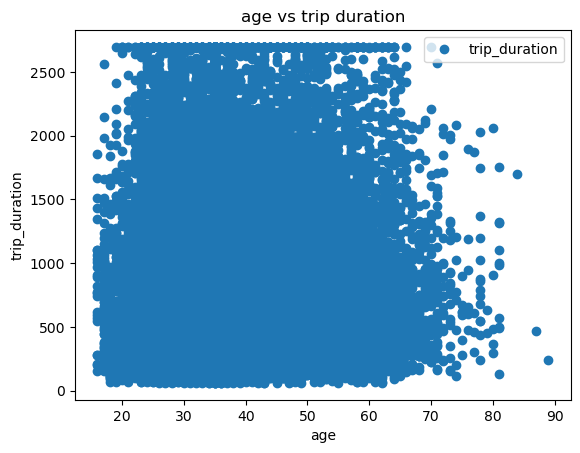

In [69]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

bike_cleaned.plot(x = 'age', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('age vs trip duration')  
plt.xlabel('age')  
plt.ylabel('trip_duration')  
plt.show()

In [71]:
# Reshaping the variables into NumPy arrays and put them into separate objects.

X = bike_cleaned['age'].values.reshape(-1,1)
y = bike_cleaned['trip_duration'].values.reshape(-1,1)

In [75]:
X

array([[45],
       [30],
       [24],
       ...,
       [52],
       [35],
       [33]])

In [77]:
y

array([[ 993],
       [ 581],
       [ 361],
       ...,
       [1050],
       [2697],
       [ 370]])

In [79]:
# Spliting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression Analysis

In [83]:
# Creating a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [85]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [87]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

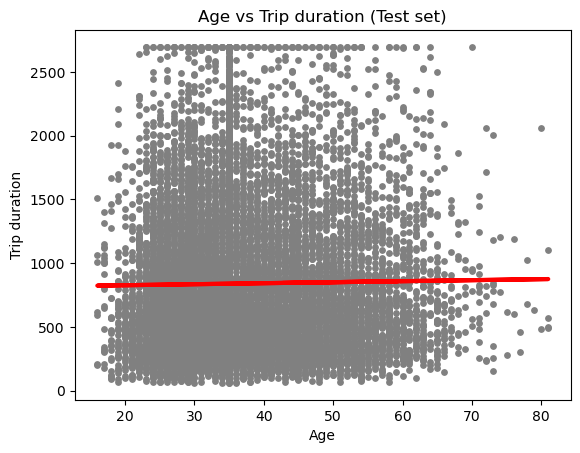

In [89]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age vs Trip duration (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Trip duration')
plot_test.show()

In [91]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [93]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.79281843]]
Mean squared error:  323752.6709939356
R2 score:  0.00026779792908337985


In [95]:
y_predicted

array([[857.71658362],
       [845.8243071 ],
       [847.40994397],
       ...,
       [853.75249145],
       [840.27457806],
       [845.03148867]])

In [97]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2001,857.716584
1,547,845.824307
2,2197,847.409944
3,1693,846.617126
4,528,829.967938
5,1729,838.688941
6,351,832.346394
7,570,828.382302
8,531,829.175120
9,272,853.752491


In [99]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [101]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [103]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.79281843]]
Mean squared error:  331297.96991428145
R2 score:  0.00019673211680049096


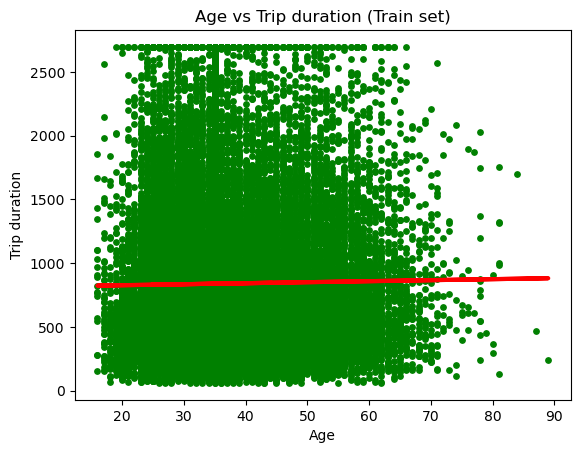

In [105]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Age vs Trip duration (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('Trip duration')
plot_test.show()